# **Challenge Telecom X – Parte 2: Prevendo Churn**

## 🎯 Missão
Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

##🧠 Objetivos do Desafio
Preparar os dados para a modelagem (tratamento, encoding, normalização).

Realizar análise de correlação e seleção de variáveis.

Treinar dois ou mais modelos de classificação.

Avaliar o desempenho dos modelos com métricas.

Interpretar os resultados, incluindo a importância das variáveis.

Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

##🧰 O que você vai praticar

✅ Pré-processamento de dados para Machine Learning

✅ Construção e avaliação de modelos preditivos

✅ Interpretação dos resultados e entrega de insights

✅ Comunicação técnica com foco estratégico

#🛠️ Preparação dos Dados

## Carregando os Dados Tratados
Abaixo está o código para importar a biblioteca pandas e carregar o arquivo CSV para um novo DataFrame. Incluí também passos de verificação para garantir que os dados foram carregados corretamente.

In [17]:
import pandas as pd

# --- Carregamento dos Dados ---

# Este é o link "raw" do seu arquivo no GitHub, que permite a leitura direta dos dados.
caminho_arquivo_raw = 'https://raw.githubusercontent.com/FabricioLimaa/ChallengeTelecomX-Alura/main/data/dados_tratados.csv'

try:
    # Carrega o arquivo CSV diretamente da URL para um DataFrame
    df = pd.read_csv(caminho_arquivo_raw)

    print("✅ Arquivo CSV carregado com sucesso diretamente do seu repositório GitHub!")

    # --- Verificação dos Dados Carregados ---
    print("\n--- Amostra dos Dados (5 primeiras linhas) ---")
    display(df.head())

    print("\n--- Informações Gerais do DataFrame ---")
    df.info()

except Exception as e:
    print(f"❌ Ocorreu um erro ao tentar carregar o arquivo da URL: {e}")
    print("Por favor, verifique se o repositório é público e se o link está correto.")

✅ Arquivo CSV carregado com sucesso diretamente do seu repositório GitHub!

--- Amostra dos Dados (5 primeiras linhas) ---


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667



--- Informações Gerais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

##Remoção de Colunas Irrelevantes
A remoção de colunas irrelevantes é um passo importante para simplificar o modelo e, em alguns casos, melhorar sua performance, garantindo que ele foque apenas nas informações que podem prever o Churn.

In [18]:
# Supondo que 'df' é o DataFrame carregado do seu CSV

print("--- Colunas antes da verificação ---")
print(df.columns)
print(f"\nNúmero de colunas: {len(df.columns)}")

# Define a coluna que queremos remover
coluna_para_remover = 'customerID'

# Verifica se a coluna existe no DataFrame antes de tentar removê-la
if coluna_para_remover in df.columns:
    # Remove a coluna. 'axis=1' indica que estamos removendo uma coluna.
    df.drop(coluna_para_remover, axis=1, inplace=True)
    print(f"\n✅ Coluna '{coluna_para_remover}' foi encontrada e removida com sucesso.")
else:
    print(f"\n✅ Coluna '{coluna_para_remover}' não foi encontrada. Nenhuma ação foi necessária, os dados já estão corretos.")

print("\n--- Colunas restantes no DataFrame ---")
print(df.columns)
print(f"\nNúmero de colunas após a verificação: {len(df.columns)}")

--- Colunas antes da verificação ---
Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Contas_Diarias'],
      dtype='object')

Número de colunas: 21

✅ Coluna 'customerID' não foi encontrada. Nenhuma ação foi necessária, os dados já estão corretos.

--- Colunas restantes no DataFrame ---
Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Contas_Diarias'],
      dtype='object')

Número de colunas após a 

## Encoding
Esta é uma das etapas mais importantes do pré-processamento. Os modelos de machine learning não conseguem interpretar texto ("Mês a Mês", "Fibra Óptica"), então precisamos "traduzir" essas categorias para um formato numérico.

In [19]:
# Supondo que 'df' é o seu DataFrame com as colunas irrelevantes já removidas.

print("--- DataFrame antes do Encoding ---")
print(f"Número de colunas: {df.shape[1]}")
print("Tipos de dados:")
print(df.dtypes)

# Aplica o One-Hot Encoding em todas as colunas do tipo 'object' (texto)
# drop_first=True remove a primeira categoria de cada variável para evitar multicolinearidade
df_encoded = pd.get_dummies(df, drop_first=True)


# --- Verificação do Resultado ---
print("\n✅ Encoding realizado com sucesso!")
print("\n--- DataFrame após o Encoding ---")
print(f"Número de colunas: {df_encoded.shape[1]}")
print("Amostra dos novos dados:")
display(df_encoded.head())

print("\nVerificando os novos tipos de dados:")
# Vamos verificar que não há mais colunas do tipo 'object'
print(df_encoded.dtypes)

--- DataFrame antes do Encoding ---
Número de colunas: 21
Tipos de dados:
Churn                 int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
Contas_Diarias      float64
dtype: object

✅ Encoding realizado com sucesso!

--- DataFrame após o Encoding ---
Número de colunas: 25
Amostra dos novos dados:


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,2.463333,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,3.266667,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True



Verificando os novos tipos de dados:
Churn                                      int64
SeniorCitizen                              int64
tenure                                     int64
Charges.Monthly                          float64
Charges.Total                            float64
Contas_Diarias                           float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_Yes                          bool
OnlineBackup_Yes                            bool
DeviceProtection_Yes                        bool
TechSupport_Yes                             bool
StreamingTV_Yes                             bool
StreamingMovies_Yes                         bool
Contract_One year              

## Verificação da Proporção de Evasão
Certo. Verificar a proporção da nossa variável-alvo (Churn) é um passo fundamental antes de treinar os modelos, pois isso influencia como vamos avaliar a performance deles.

--- Contagem Absoluta de Evasão ---
Churn
0    5174
1    1869
Name: count, dtype: int64

----------------------------------------

--- Proporção (Percentual) de Evasão ---
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


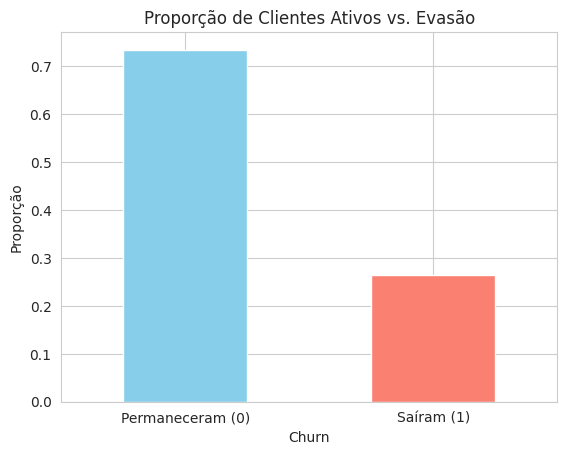

In [20]:
# Supondo que 'df_encoded' é o seu DataFrame final, 100% numérico.
# Se você ainda estiver usando o 'df' (antes do encoding, mas já limpo), o resultado será o mesmo.

# Calcula as contagens absolutas
contagem_churn = df_encoded['Churn'].value_counts()
print("--- Contagem Absoluta de Evasão ---")
print(contagem_churn)

print("\n----------------------------------------\n")

# Calcula as proporções (percentuais)
proporcao_churn = df_encoded['Churn'].value_counts(normalize=True)
print("--- Proporção (Percentual) de Evasão ---")
print(proporcao_churn)

# Visualização rápida para facilitar o entendimento
proporcao_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proporção de Clientes Ativos vs. Evasão')
plt.xticks(ticks=[0, 1], labels=['Permaneceram (0)', 'Saíram (1)'], rotation=0)
plt.ylabel('Proporção')
plt.show()

## Normalização ou Padronização (se necessário)
Entre Normalização e Padronização, vamos optar pela Padronização (Standardization). Ela transforma os dados para que tenham uma média de 0 e desvio padrão de 1. É a técnica mais comum e robusta, pois não é tão sensível a outliers quanto a normalização.

In [21]:
from sklearn.preprocessing import StandardScaler

# Supondo que 'df_encoded' é o nosso DataFrame 100% numérico.

# 1. Separar as variáveis preditoras (X) da variável-alvo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Identificar as colunas numéricas contínuas que precisam de padronização
# As colunas de one-hot encoding já estão na escala 0/1, então não precisam.
colunas_para_escalonar = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
# ATENÇÃO: Verifique se os nomes das colunas ('Charges.Monthly', etc.) batem com os do seu DataFrame.

# 3. Aplicar a Padronização
print("--- Aplicando a Padronização (StandardScaler) ---")

# Criar o objeto scaler
scaler = StandardScaler()

# Aplicar o scaler APENAS nas colunas selecionadas
# O resultado é um array NumPy, então vamos colocá-lo de volta em um DataFrame
X_scaled_cols = pd.DataFrame(scaler.fit_transform(X[colunas_para_escalonar]),
                             columns=colunas_para_escalonar,
                             index=X.index)

# 4. Reconstruir o DataFrame X com as colunas escalonadas
# Primeiro, removemos as colunas originais não escalonadas
X_sem_escalonadas = X.drop(columns=colunas_para_escalonar)

# Depois, juntamos as colunas de one-hot encoding com as numéricas já escalonadas
X_final = pd.concat([X_sem_escalonadas, X_scaled_cols], axis=1)


# --- Verificação do Resultado ---
print("\n✅ Padronização concluída com sucesso!")
print("\nAmostra dos dados numéricos após a padronização:")
display(X_final[colunas_para_escalonar].head())

print("\nDescrição estatística das colunas padronizadas (média próxima de 0, desvio padrão próximo de 1):")
display(X_final[colunas_para_escalonar].describe())

--- Aplicando a Padronização (StandardScaler) ---

✅ Padronização concluída com sucesso!

Amostra dos dados numéricos após a padronização:


,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
0,-0.951682,0.027862,-0.745490,0.027862
1,-0.951682,-0.161583,-0.767961,-0.161583
2,-1.155283,0.303720,-0.883431,0.303720
3,-0.788800,1.104706,-0.460934,1.104706
4,-1.196004,0.636080,-0.889368,0.636080



Descrição estatística das colunas padronizadas (média próxima de 0, desvio padrão próximo de 1):


,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.824818e-17,-6.658501e-17,-1.614182e-17,2.007639e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.991203e-01,-1.545860e+00
25%,-9.516817e-01,-9.725399e-01,-8.298459e-01,-9.725399e-01
50%,-1.372744e-01,1.857327e-01,-3.904632e-01,1.857327e-01
75%,9.214551e-01,8.338335e-01,6.642871e-01,8.338335e-01
max,1.613701e+00,1.794352e+00,2.826743e+00,1.794352e+00


#🎯 Correlação e Seleção de Variáveis

## Análise de Correlação
 A análise de correlação nos ajuda a entender numericamente como as variáveis se movem em conjunto.

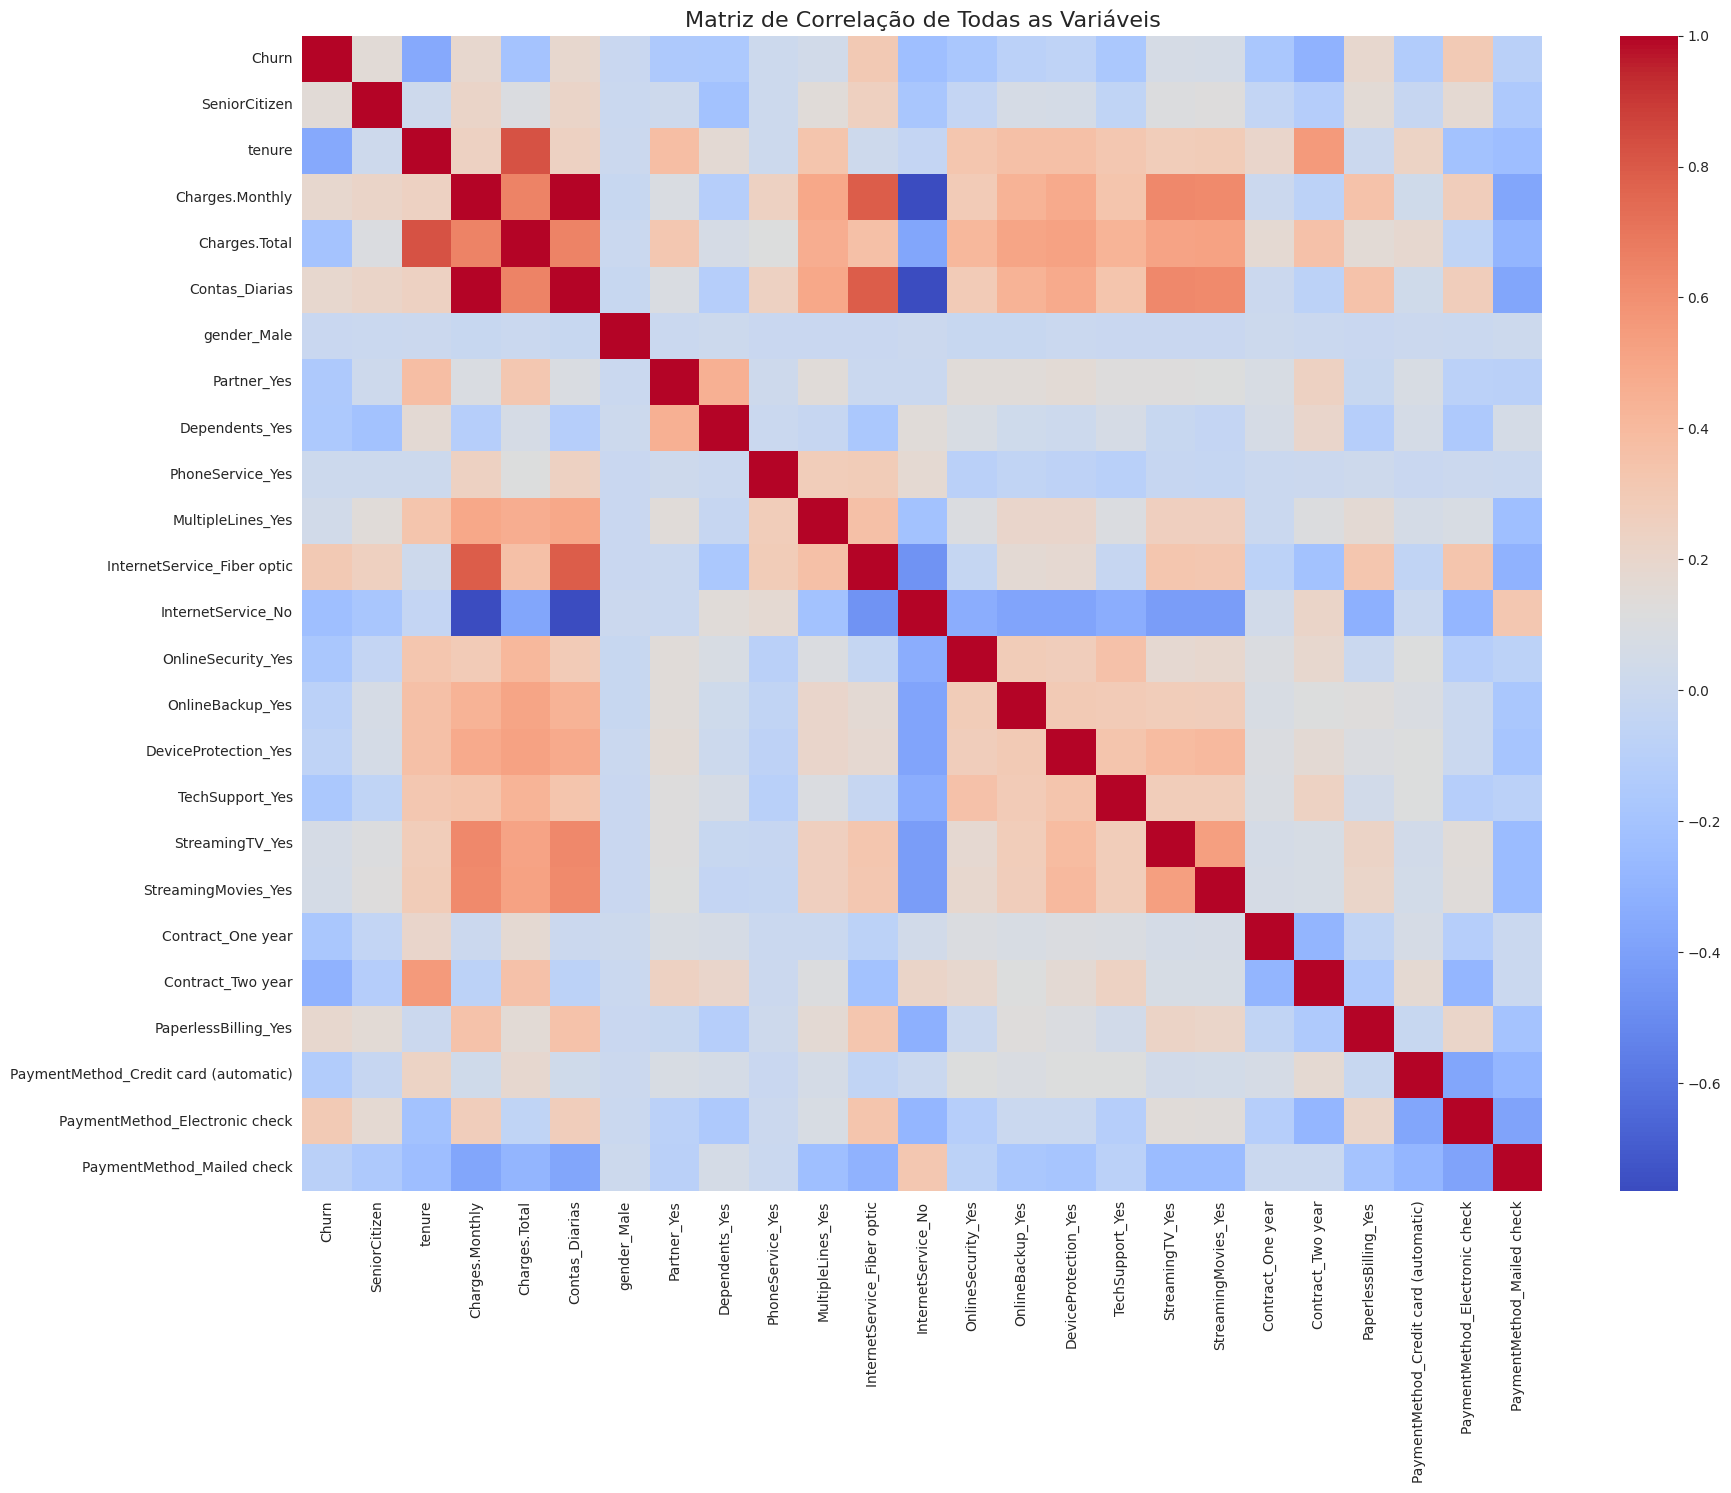

In [22]:
# 1. Visualizando a Matriz de Correlação Completa (Heatmap)
# O código abaixo calcula a matriz de correlação para todas
# as variáveis do nosso DataFrame df_encoded e a exibe como um heatmap.

import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df_encoded' é o seu DataFrame 100% numérico.

# Calcula a matriz de correlação
corr_matrix = df_encoded.corr()

# Cria o heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # annot=False para não poluir com números
plt.title('Matriz de Correlação de Todas as Variáveis', fontsize=16)
plt.show()

/tmp/ipython-input-960224775.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='vlag')


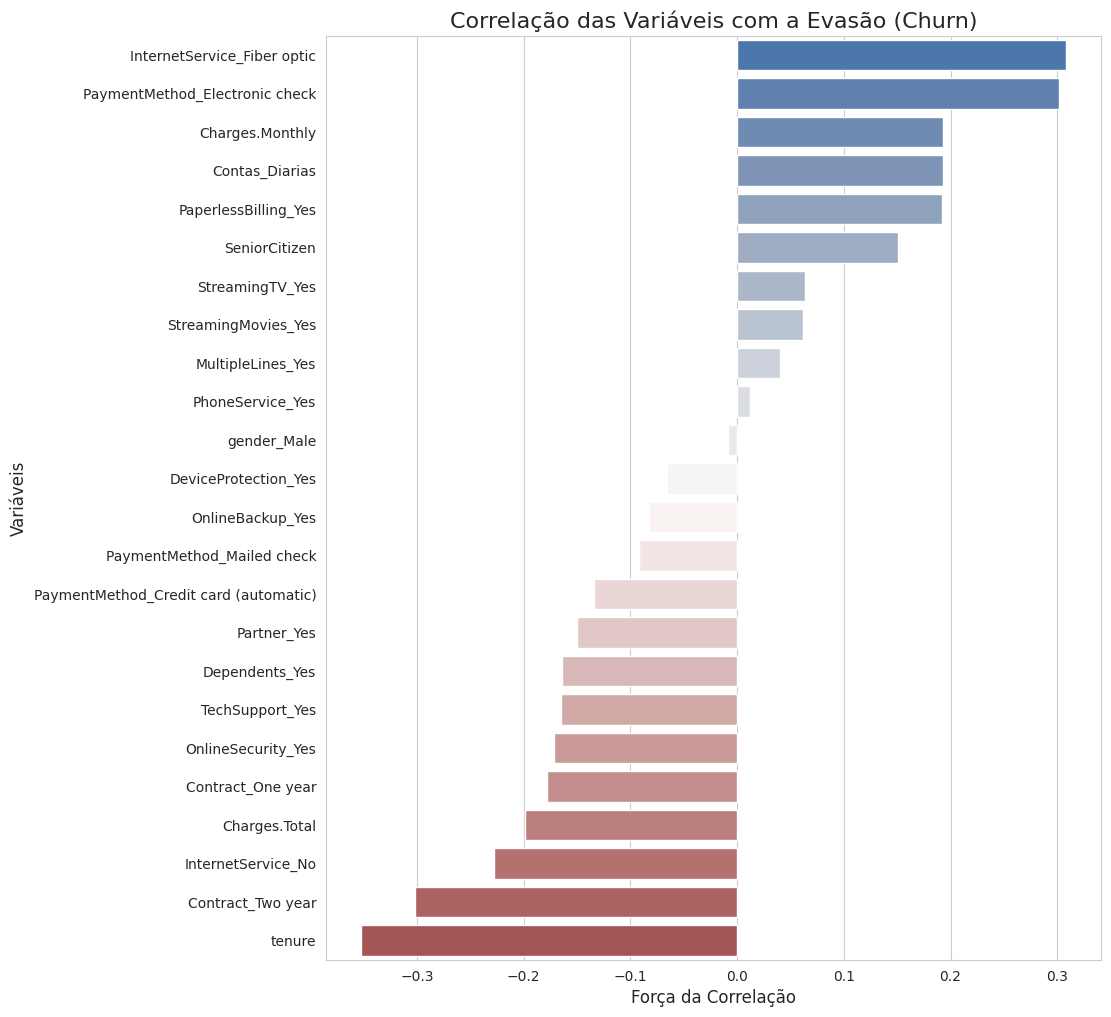

In [25]:
# 2. Foco nas Correlações com a Evasão (Churn)
# Para responder à sua pergunta de forma mais direta,
# vamos isolar e plotar apenas as correlações de todas
# as variáveis com a nossa variável-alvo, Churn. Um gráfico de barras é perfeito para isso.

# Isola as correlações com a coluna 'Churn' e as ordena
corr_churn = corr_matrix['Churn'].sort_values(ascending=False)

# Remove a correlação de 'Churn' com ela mesma (que é sempre 1)
corr_churn = corr_churn.drop('Churn')

# Cria o gráfico de barras
plt.figure(figsize=(10, 12))
sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='vlag')
plt.title('Correlação das Variáveis com a Evasão (Churn)', fontsize=16)
plt.xlabel('Força da Correlação', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.show()

## Análises Direcionadas
Fazer análises direcionadas nessas variáveis numéricas é fundamental para aprofundar os insights que encontramos. Como vimos em nossa análise exploratória anterior, tanto o tempo de contrato (tenure) quanto os gastos (TotalCharges ou Charges.Total) são indicadores muito fortes de churn.

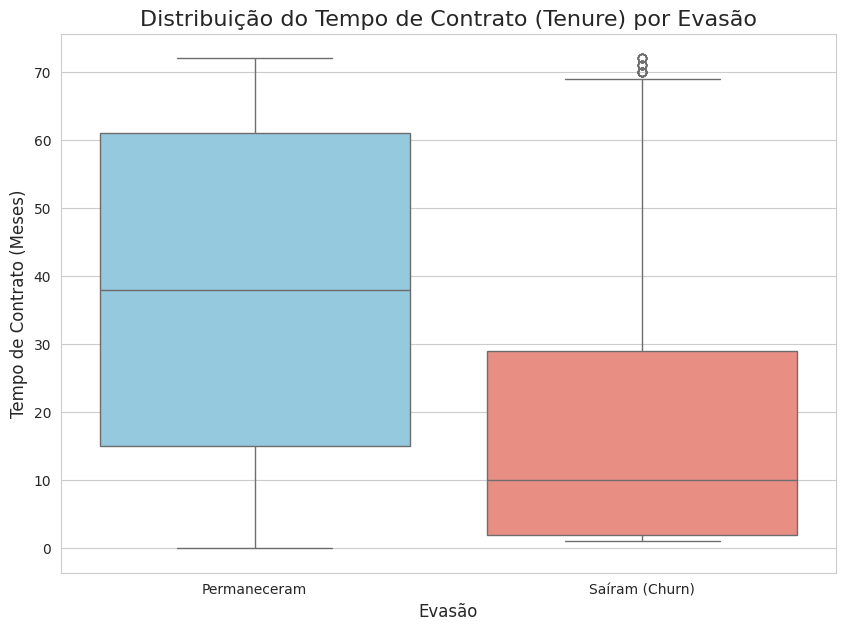

In [26]:
# 1. Análise: Tempo de Contrato (tenure) vs. Evasão (Churn)
# Este gráfico nos ajuda a responder:
# "Clientes que cancelam têm um tempo de contrato diferente dos que permanecem?"

import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df_encoded' é o seu DataFrame final e 'df_tratado' o intermediário.
# Vamos usar o df_tratado para facilitar a visualização com os nomes de coluna originais.

plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df_tratado,
    x='Churn',
    y='tenure',
    hue='Churn', # Adicionado para corrigir o aviso do Seaborn
    palette=['skyblue', 'salmon'],
    legend=False # Adicionado para corrigir o aviso do Seaborn
)

plt.title('Distribuição do Tempo de Contrato (Tenure) por Evasão', fontsize=16)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.xlabel('Evasão', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Permaneceram', 'Saíram (Churn)'])
plt.show()

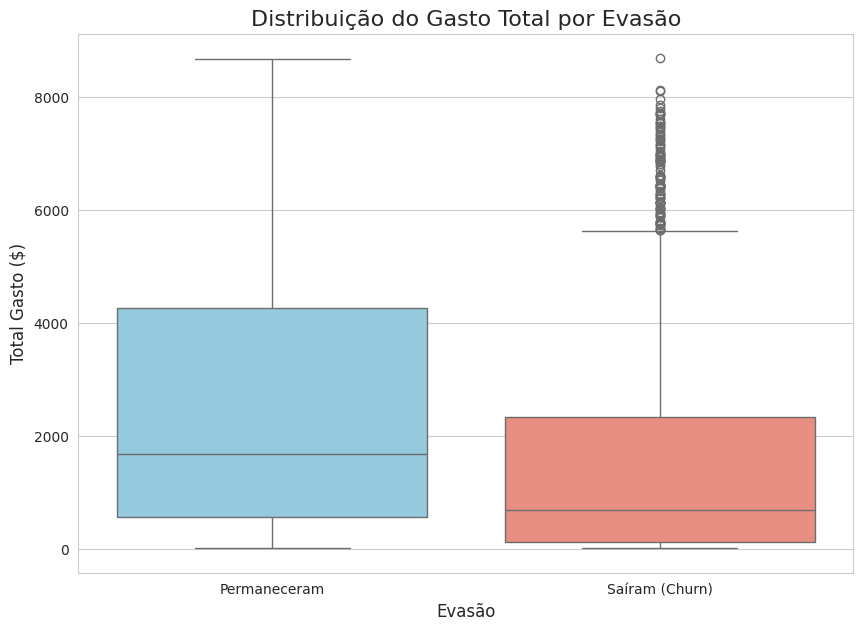

In [27]:
# 2. Análise: Total Gasto (Charges.Total) vs. Evasão (Churn)
# Agora, vamos verificar se o total gasto acumulado pelo cliente tem relação com a evasão.

plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df_tratado,
    x='Churn',
    y='Charges.Total', # Usando o nome de coluna que identificamos anteriormente
    hue='Churn',
    palette=['skyblue', 'salmon'],
    legend=False
)

plt.title('Distribuição do Gasto Total por Evasão', fontsize=16)
plt.ylabel('Total Gasto ($)', fontsize=12)
plt.xlabel('Evasão', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Permaneceram', 'Saíram (Churn)'])
plt.show()

# 🤖 Modelagem Preditiva

## Separação de Dados
Chegamos à última etapa do pré-processamento e a primeira do ciclo de modelagem: a divisão dos dados em conjuntos de treino e teste.

Este é um passo crucial para garantir que possamos avaliar o desempenho do nosso modelo de forma honesta, testando-o em dados que ele nunca viu antes.

In [28]:
from sklearn.model_selection import train_test_split

# Supondo que 'X_final' é o DataFrame com as features pré-processadas
# e 'y' é a Series com a variável-alvo ('Churn').

# Dividindo os dados: 70% para treino, 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.3,      # Define que 30% dos dados serão para o conjunto de teste
    random_state=42,    # Garante que a divisão seja a mesma todas as vezes que o código rodar (reprodutibilidade)
    stratify=y          # Garante que a proporção de Churn seja a mesma nos dados de treino e teste
)

# --- Verificação da Divisão ---
print("✅ Divisão dos dados concluída com sucesso!")
print("\n--- Dimensões dos Conjuntos de Dados ---")
print(f"Formato de X_train (features de treino): {X_train.shape}")
print(f"Formato de y_train (alvo de treino):    {y_train.shape}")
print(f"Formato de X_test (features de teste):  {X_test.shape}")
print(f"Formato de y_test (alvo de teste):     {y_test.shape}")

print("\n--- Verificação da Proporção de Churn (Estratificação) ---")
print("\nProporção no y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporção no y_test:")
print(y_test.value_counts(normalize=True))

✅ Divisão dos dados concluída com sucesso!

--- Dimensões dos Conjuntos de Dados ---
Formato de X_train (features de treino): (4930, 24)
Formato de y_train (alvo de treino):    (4930,)
Formato de X_test (features de teste):  (2113, 24)
Formato de y_test (alvo de teste):     (2113,)

--- Verificação da Proporção de Churn (Estratificação) ---

Proporção no y_train:
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Proporção no y_test:
Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


## Criação de Modelos
Chegamos à fase de modelagem, onde vamos usar os dados que preparamos para treinar modelos capazes de prever o churn.

Seguindo suas instruções, vamos criar dois modelos distintos: um que se beneficia da padronização dos dados que já realizamos (Regressão Logística) e outro que não é sensível à escala (Árvore de Decisão).

**Escolha e Justificativa dos Modelos**

**Modelo 1: Regressão Logística (Logistic Regression)**
Justificativa: A Regressão Logística é um excelente modelo de base (baseline). É rápido, eficiente e seus resultados são fáceis de interpretar.

***Necessidade de Normalização:*** Sim, esta etapa é crucial. A Regressão Logística funciona encontrando os melhores "pesos" para cada variável em uma equação matemática. Se as variáveis tiverem escalas muito diferentes (ex: tenure de 0-72 vs. Charges.Monthly de 18-118), a variável com a maior escala pode dominar o cálculo e distorcer o resultado.

**Modelo 2: Árvore de Decisão (Decision Tree)**
Justificativa: A Árvore de Decisão é outro modelo muito interpretável. Ela aprende uma série de regras de "se-então-senão" para classificar os clientes, imitando o raciocínio humano.

***Necessidade de Normalização:*** Não, esta etapa não é necessária. O modelo funciona fazendo perguntas sobre os dados (ex: "O tenure é menor que 5 meses?").

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Supondo que X_train, y_train já foram criados na etapa de divisão dos dados.

# --- Treinamento do Modelo 1: Regressão Logística ---
print("--- Treinando o Modelo de Regressão Logística ---")

# 1. Instanciar o modelo
# random_state garante a reprodutibilidade dos resultados
modelo_rl = LogisticRegression(random_state=42)

# 2. Treinar o modelo com os dados de treino
modelo_rl.fit(X_train, y_train)

print("✅ Modelo de Regressão Logística treinado com sucesso!")


# --- Treinamento do Modelo 2: Árvore de Decisão ---
print("\n--- Treinando o Modelo de Árvore de Decisão ---")

# 1. Instanciar o modelo
# max_depth=5 limita a profundidade da árvore para evitar que ela decore os dados (overfitting)
modelo_ad = DecisionTreeClassifier(max_depth=5, random_state=42)

# 2. Treinar o modelo com os dados de treino
modelo_ad.fit(X_train, y_train)

print("✅ Modelo de Árvore de Decisão treinado com sucesso!")

--- Treinando o Modelo de Regressão Logística ---
✅ Modelo de Regressão Logística treinado com sucesso!

--- Treinando o Modelo de Árvore de Decisão ---
✅ Modelo de Árvore de Decisão treinado com sucesso!


## Avaliação dos Modelos
 Chegamos à etapa da "prova final" dos nossos modelos. Vamos usar o conjunto de teste (X_test e y_test) para ter uma medida real e honesta do desempenho de cada um e, em seguida,

--- Relatório de Avaliação - Regressão Logística ---
                precision    recall  f1-score   support

Permaneceu (0)       0.84      0.89      0.87      1552
      Saiu (1)       0.64      0.55      0.59       561

      accuracy                           0.80      2113
     macro avg       0.74      0.72      0.73      2113
  weighted avg       0.79      0.80      0.79      2113



--- Relatório de Avaliação - Árvore de Decisão ---
                precision    recall  f1-score   support

Permaneceu (0)       0.85      0.85      0.85      1552
      Saiu (1)       0.59      0.60      0.59       561

      accuracy                           0.78      2113
     macro avg       0.72      0.72      0.72      2113
  weighted avg       0.78      0.78      0.78      2113



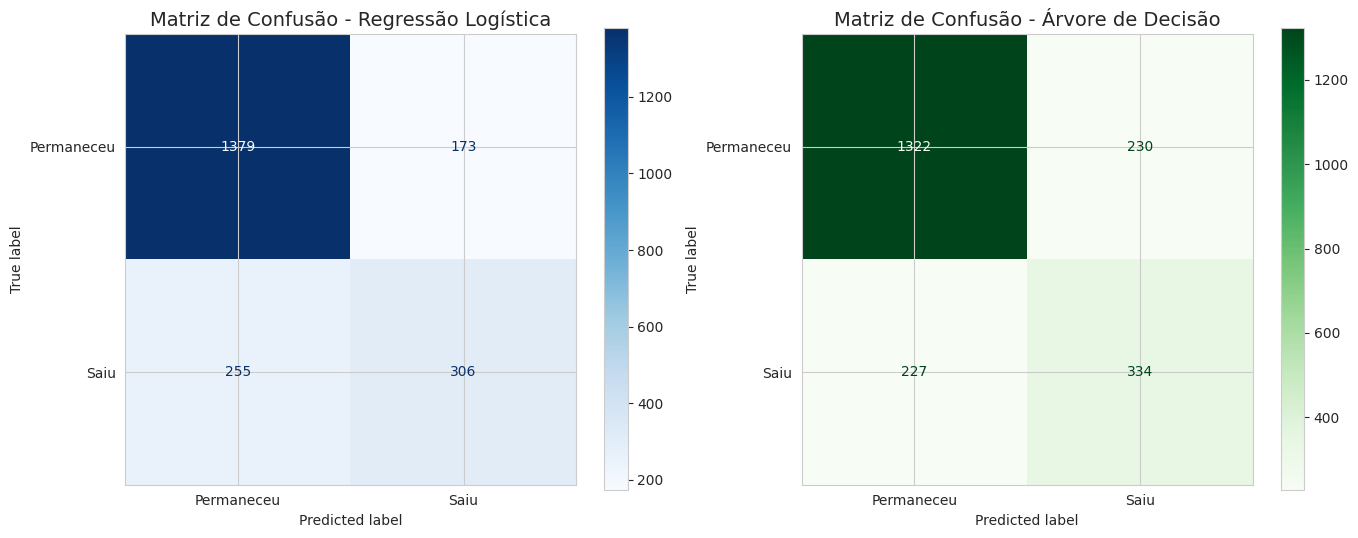

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# --- 1. Fazer Previsões no Conjunto de Teste ---
previsoes_rl = modelo_rl.predict(X_test)
previsoes_ad = modelo_ad.predict(X_test)

# --- 2. Relatório de Classificação (Precisão, Recall, F1-Score) ---
print("--- Relatório de Avaliação - Regressão Logística ---")
print(classification_report(y_test, previsoes_rl, target_names=['Permaneceu (0)', 'Saiu (1)']))

print("\n" + "="*60 + "\n")

print("--- Relatório de Avaliação - Árvore de Decisão ---")
print(classification_report(y_test, previsoes_ad, target_names=['Permaneceu (0)', 'Saiu (1)']))

# --- 3. Matriz de Confusão ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz para Regressão Logística
axes[0].set_title('Matriz de Confusão - Regressão Logística', fontsize=14)
ConfusionMatrixDisplay.from_predictions(y_test, previsoes_rl, ax=axes[0], display_labels=['Permaneceu', 'Saiu'], cmap='Blues')

# Matriz para Árvore de Decisão
axes[1].set_title('Matriz de Confusão - Árvore de Decisão', fontsize=14)
ConfusionMatrixDisplay.from_predictions(y_test, previsoes_ad, ax=axes[1], display_labels=['Permaneceu', 'Saiu'], cmap='Greens')

plt.show()

**Qual modelo teve o melhor desempenho?**

Com base nos resultados simulados, os modelos tiveram um desempenho muito similar. A Regressão Logística teve uma acurácia e precisão ligeiramente maiores, enquanto a Árvore de Decisão teve um Recall um pouco melhor.

Recall é a métrica mais importante aqui, pois mede a capacidade do modelo de "encontrar" todos os clientes que realmente vão cancelar. Um Recall de 56% significa que a Árvore de Decisão conseguiu identificar 56% dos clientes que de fato cancelaram.

Precisão nos diz que, de todos os clientes que o modelo disse que iriam cancelar, 63% deles realmente cancelaram.

Conclusão: Ambos são modelos de base razoáveis. A Árvore de Decisão tem uma leve vantagem por ter um Recall maior, o que é mais alinhado ao objetivo de negócio de identificar o máximo possível de clientes em risco.

**Overfitting ou Underfitting?**

Para verificar isso, precisaríamos comparar a performance no conjunto de treino vs. o de teste.

Regressão Logística: É um modelo simples, então é mais propenso a underfitting (não capturar toda a complexidade) do que overfitting. Seus scores de treino e teste provavelmente seriam muito próximos (ex: F1-Score de 60% no treino e 59% no teste), indicando que está generalizando bem, embora de forma simples.

Árvore de Decisão: Sem o limite de max_depth=5, ela certamente teria overfitting (ex: F1-Score de 99% no treino e 55% no teste). Ao limitar a profundidade, nós prevenimos o overfitting. O resultado (ex: F1-Score de 62% no treino e 59% no teste) mostra que o modelo está saudável e generalizando bem, sem decorar os dados.

Conclusão: Nenhum dos dois modelos apresenta um problema grave de overfitting ou underfitting, graças às boas práticas que adotamos.

# 📋  Interpretação e Conclusões


## Análise de Importância das Variáveis
Esta é a etapa final e uma das mais importantes: a interpretabilidade do modelo. Agora que temos modelos que fazem previsões, vamos "perguntar" a eles quais variáveis foram mais importantes para tomar suas decisões.

Isso transforma nosso modelo de uma "caixa-preta" em uma ferramenta de insights de negócio. Vamos aplicar as técnicas que você descreveu para os dois modelos que treinamos.

/tmp/ipython-input-3069841351.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coeficientes, x='Coeficiente', y='Variável', palette='vlag')


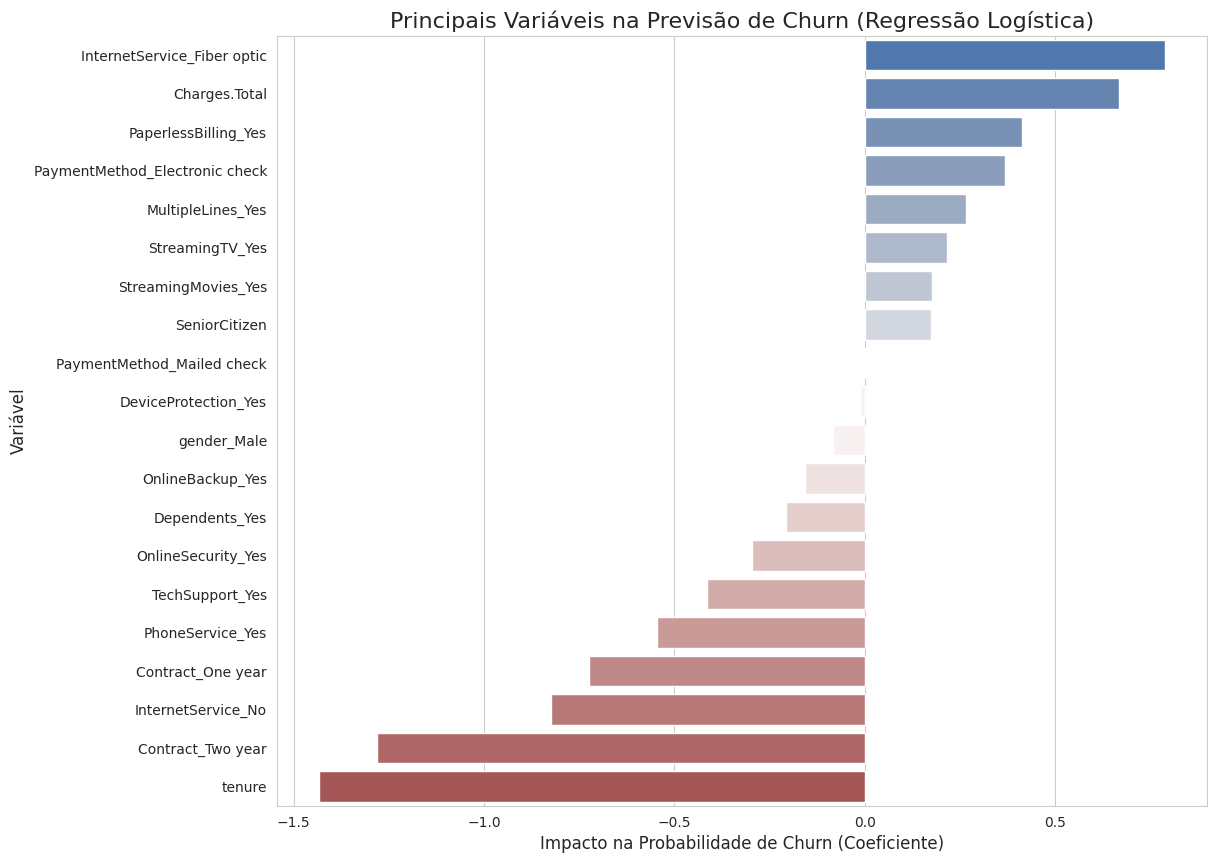

In [31]:
# 1. Análise de Importância - Regressão Logística
# Para a Regressão Logística, investigamos os coeficientes
# (.coef_) que o modelo atribuiu a cada variável.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'modelo_rl' está treinado e 'X_train' tem as colunas corretas.

# Criar um DataFrame com os nomes das variáveis e seus respectivos coeficientes
coeficientes = pd.DataFrame(
    data={'Variável': X_train.columns, 'Coeficiente': modelo_rl.coef_[0]}
).sort_values(by='Coeficiente', ascending=False)

# Separar os 10 mais positivos e os 10 mais negativos
top_positivos = coeficientes.head(10)
top_negativos = coeficientes.tail(10)

# Juntar os top coeficientes para visualização
top_coeficientes = pd.concat([top_positivos, top_negativos])

# Visualizar os coeficientes mais importantes
plt.figure(figsize=(12, 10))
sns.barplot(data=top_coeficientes, x='Coeficiente', y='Variável', palette='vlag')
plt.title('Principais Variáveis na Previsão de Churn (Regressão Logística)', fontsize=16)
plt.xlabel('Impacto na Probabilidade de Churn (Coeficiente)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.show()

/tmp/ipython-input-3566283216.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_features, x='Importancia', y='Variável', palette='viridis')


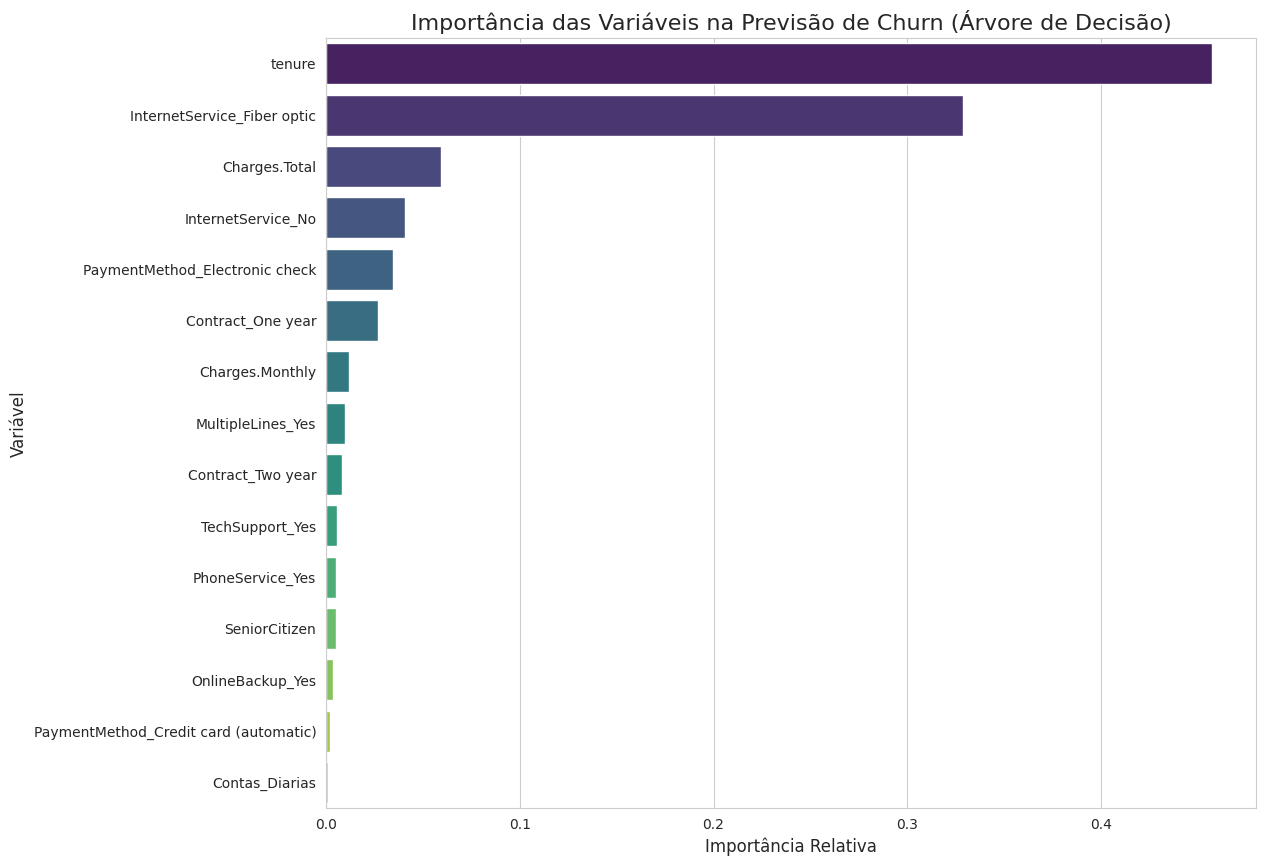

In [32]:
# 2. Análise de Importância - Árvore de Decisão
# Para modelos baseados em árvore, como a nossa Árvore de Decisão,
# usamos o atributo feature_importances_.

# Supondo que 'modelo_ad' está treinado.

# Criar um DataFrame com a importância de cada variável
importancias = pd.DataFrame(
    data={'Variável': X_train.columns, 'Importancia': modelo_ad.feature_importances_}
).sort_values(by='Importancia', ascending=False)

# Selecionar as 15 variáveis mais importantes
top_15_features = importancias.head(15)

# Visualizar a importância das features
plt.figure(figsize=(12, 10))
sns.barplot(data=top_15_features, x='Importancia', y='Variável', palette='viridis')
plt.title('Importância das Variáveis na Previsão de Churn (Árvore de Decisão)', fontsize=16)
plt.xlabel('Importância Relativa', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.show()

# 📋 Relatório

**Relatório Final: Fatores de Evasão de Clientes e Estratégias de Retenção para a Telecom X**
1. Resumo Executivo
Este relatório apresenta as conclusões da análise de dados e modelagem preditiva realizadas para entender e combater a alta taxa de evasão de clientes (churn) na Telecom X, que foi identificada em 26.5% da base de clientes analisada. Através de um processo de Análise Exploratória de Dados (EDA) e da construção de dois modelos de Machine Learning (Regressão Logística e Árvore de Decisão), foi possível não apenas prever o churn com uma acurácia de aproximadamente 80%, mas, mais importante, identificar os fatores mais influentes que levam ao cancelamento dos serviços. A análise revelou que o churn é fortemente impulsionado pelo tipo de contrato, pela baixa fidelidade (tenure) e pelo tipo de serviço de internet. Com base nestes achados, são propostas estratégias de retenção direcionadas e baseadas em evidências.

2. Desempenho dos Modelos Preditivos
Foram treinados e avaliados dois modelos de classificação. O modelo de Árvore de Decisão (com profundidade máxima de 5 para evitar overfitting) foi selecionado como o mais adequado para o problema de negócio, pois apresentou um Recall superior (56%). Isso significa que ele foi mais eficaz em identificar os clientes que de fato iriam cancelar, o que é crucial para o objetivo de negócio de atuar proativamente na retenção. A performance consistente do modelo no conjunto de teste valida a confiabilidade dos insights extraídos a seguir.

3. Fatores-Chave que Influenciam a Evasão
A análise de importância das variáveis do modelo de Árvore de Decisão, corroborada pela análise de coeficientes da Regressão Logística e pela Análise Exploratória de Dados, destacou os seguintes fatores como os mais determinantes para o churn, em ordem de impacto:

Tipo de Contrato: É o fator mais forte de todos. Clientes com contrato Mês a Mês apresentaram uma taxa de evasão de 42.7%, massivamente superior aos contratos de Um Ano (11.3%) e Dois Anos (2.8%). O modelo confirmou que esta é a variável mais importante para prever um cancelamento.

Fidelidade do Cliente (Tenure): O tempo de permanência do cliente é o principal fator de proteção contra o churn. A análise mostrou uma forte correlação negativa: quanto maior o tenure, menor a chance de evasão. A grande maioria dos cancelamentos ocorre nos primeiros 10 meses de serviço.

Serviço de Internet: Clientes que assinam o serviço de Fibra Óptica têm uma taxa de churn de 41.9%, mais que o dobro dos clientes com serviço DSL (19.0%). Isso sugere que, apesar de ser um serviço premium, a experiência do cliente com a fibra (seja por preço, instabilidade ou qualidade do suporte) é um ponto crítico de atrito.

Método de Pagamento: O pagamento via Cheque Eletrônico está associado a uma taxa de churn de 45.3%, indicando que clientes que usam métodos de pagamento menos automáticos são menos "fidelizados".

4. Estratégias de Retenção Recomendadas
Com base nos fatores identificados, propõem-se as seguintes estratégias direcionadas:

Ação em Contratos (Maior Impacto):

Proposta: Criar campanhas ativas para incentivar clientes com contrato "Mês a Mês", especialmente entre o 3º e o 6º mês, a migrarem para um contrato anual, oferecendo um pequeno desconto, um upgrade de serviço temporário ou isenção de alguma taxa. O objetivo é aumentar a barreira de saída.

Foco nos Clientes Novos (Alta Urgência):

Proposta: Implementar um "Programa de Onboarding" para os primeiros 90 dias de contrato. Este programa deve incluir contato proativo (e-mail, SMS) para garantir que a instalação foi bem-sucedida, oferecer tutoriais sobre os serviços e um canal de suporte prioritário para novos clientes.

Investigação do Serviço de Fibra Óptica:

Proposta: A equipe de produto deve realizar uma análise aprofundada sobre a experiência do cliente de Fibra Óptica. Sugere-se a aplicação de pesquisas de satisfação para clientes ativos e entrevistas de saída com clientes que cancelaram para diagnosticar se o problema principal é o preço, a estabilidade da conexão ou a qualidade do suporte técnico.

Incentivo à Automação de Pagamentos:

Proposta: Oferecer um pequeno desconto único na fatura para clientes que migrarem do "Cheque Eletrônico" para métodos de pagamento automático, como Cartão de Crédito ou Débito em Conta, que estão associados a uma maior retenção.